In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03a_wn_540_620',
                          'ng_20',
                          'g_ascending_k_descending',
                          'refPTs_P_500_T_250',
                          'ng_refs_20',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a140ac7',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03a_wn_540_620',
                          'ng_20',
                          'g_ascending_k_descending',
                          'refPTs_P_500_T_250',
                          'ng_refs_20',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a140ac7',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 540

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 20

nref = 1

p_refs = (/ 500 /)

t_refs = (/ 250 /)

ng_refs = (/ 20 /)

data wgt
     &     /20 * 1/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 6.375563e-24

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

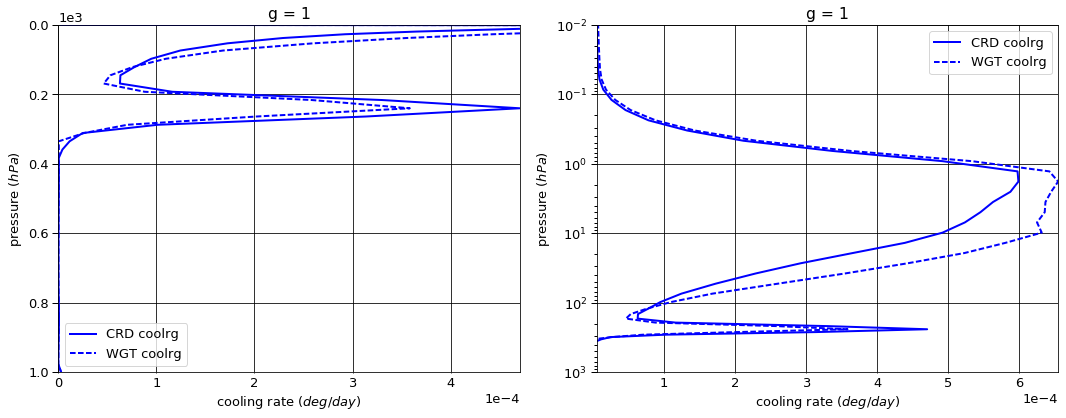

# Figure: cooling rate g-group 2

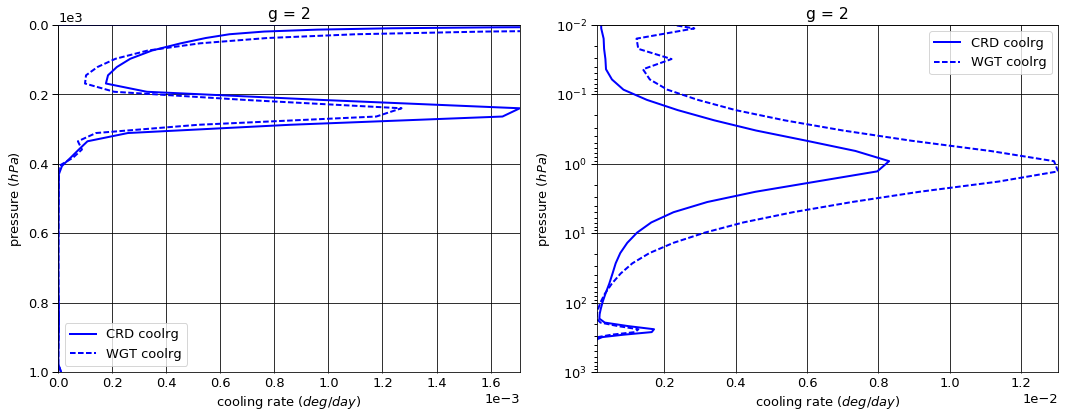

# Figure: cooling rate g-group 3

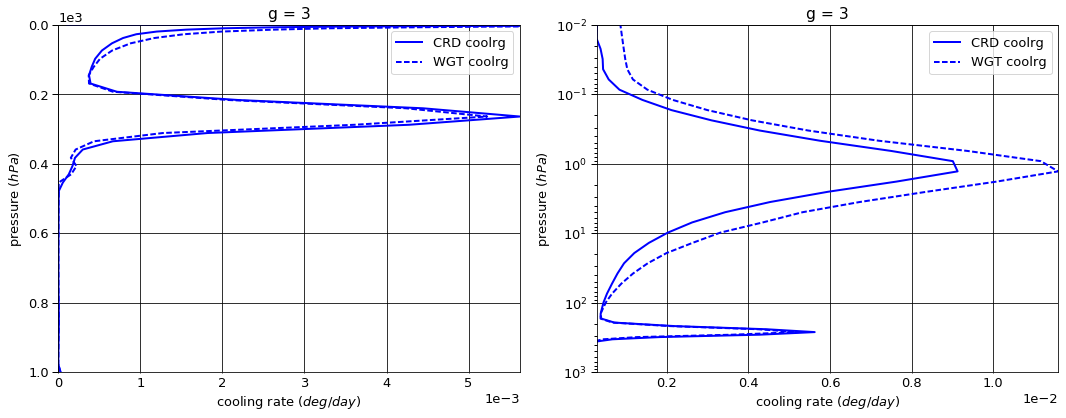

# Figure: cooling rate g-group 4

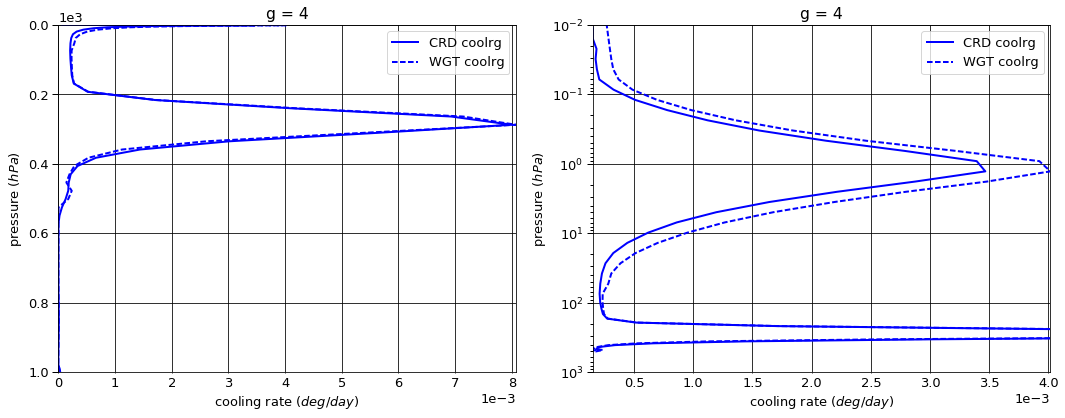

# Figure: cooling rate g-group 5

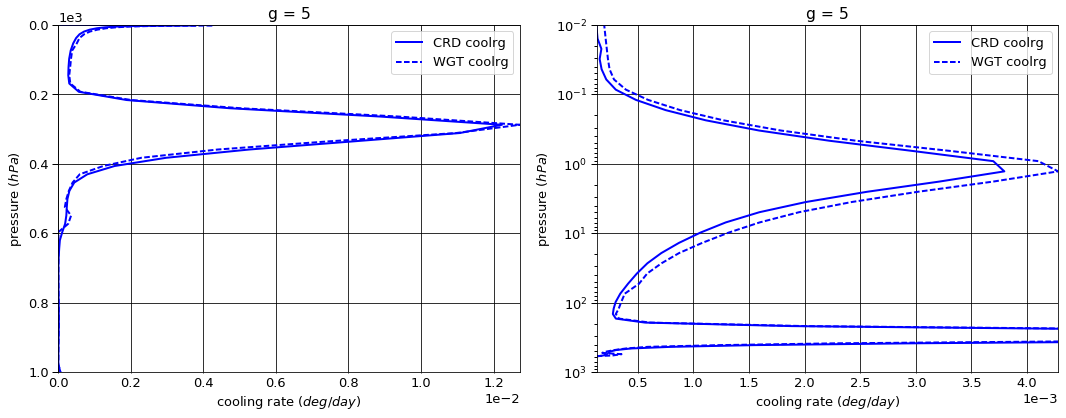

# Figure: cooling rate g-group 6

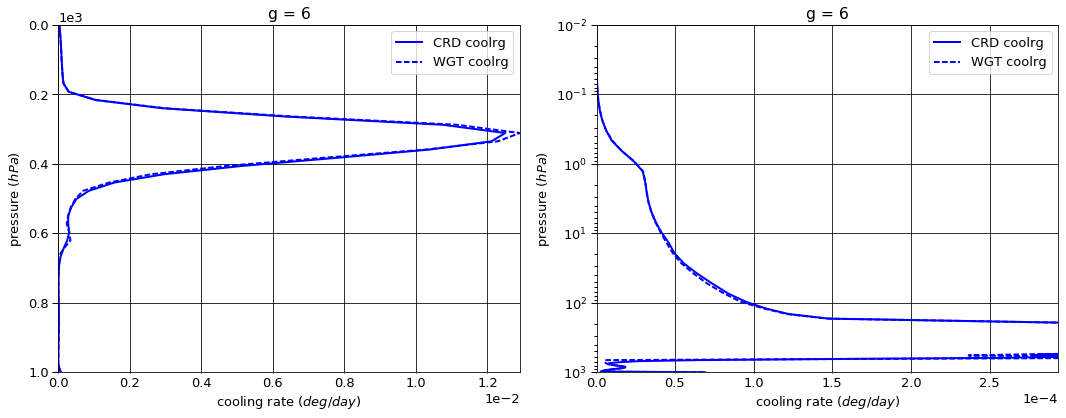

# Figure: cooling rate g-group 7

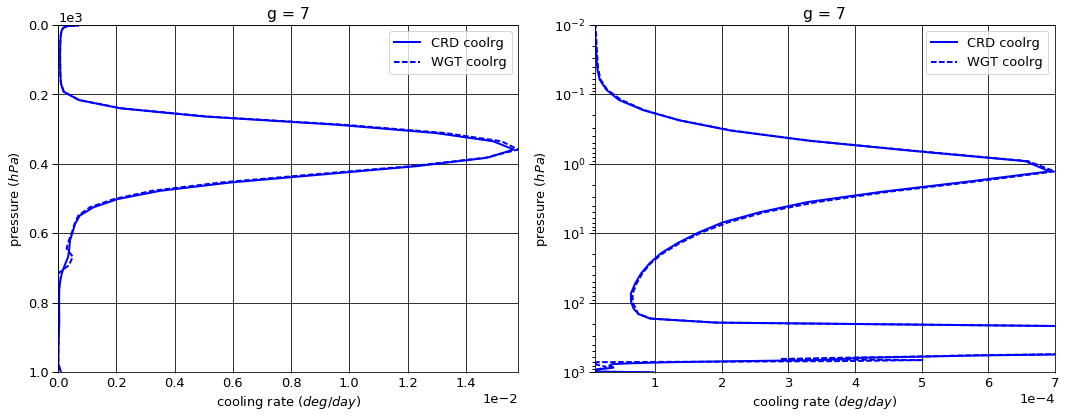

# Figure: cooling rate g-group 8

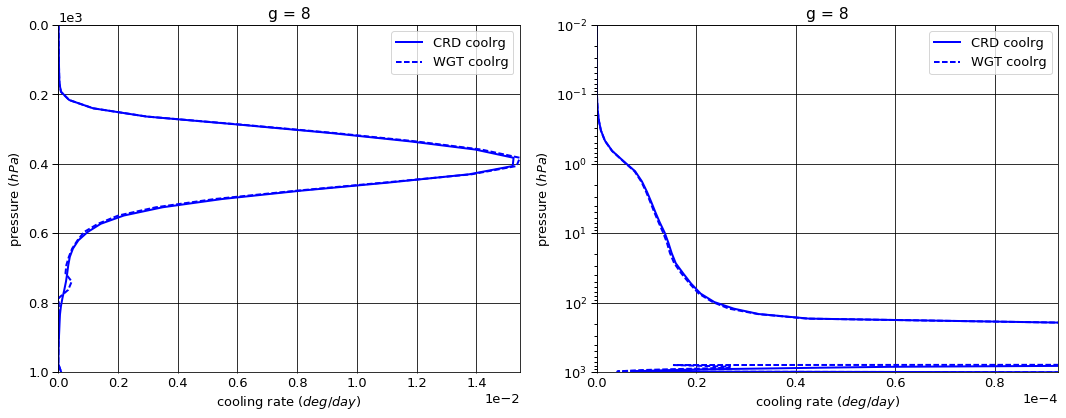

# Figure: cooling rate g-group 9

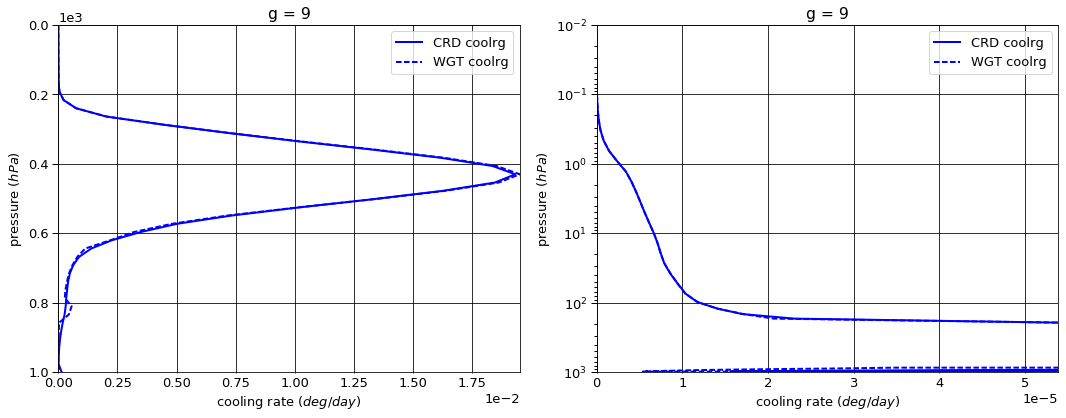

# Figure: cooling rate g-group 10

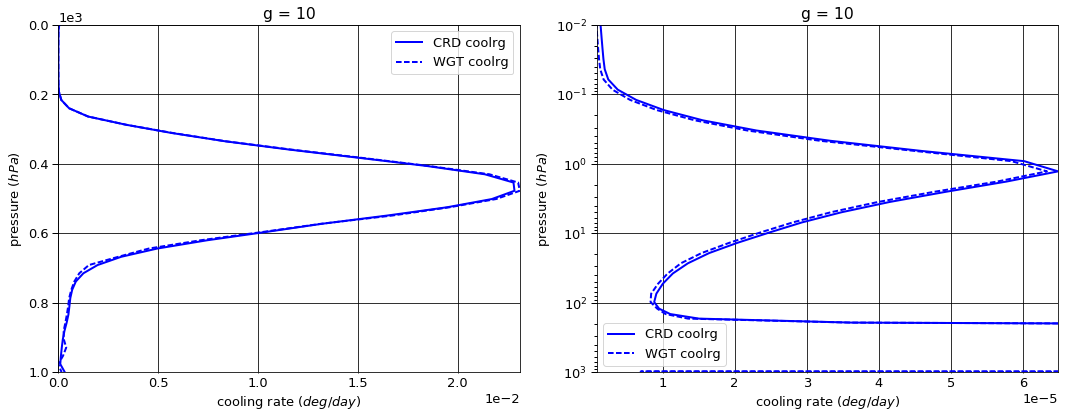

# Figure: cooling rate g-group 11

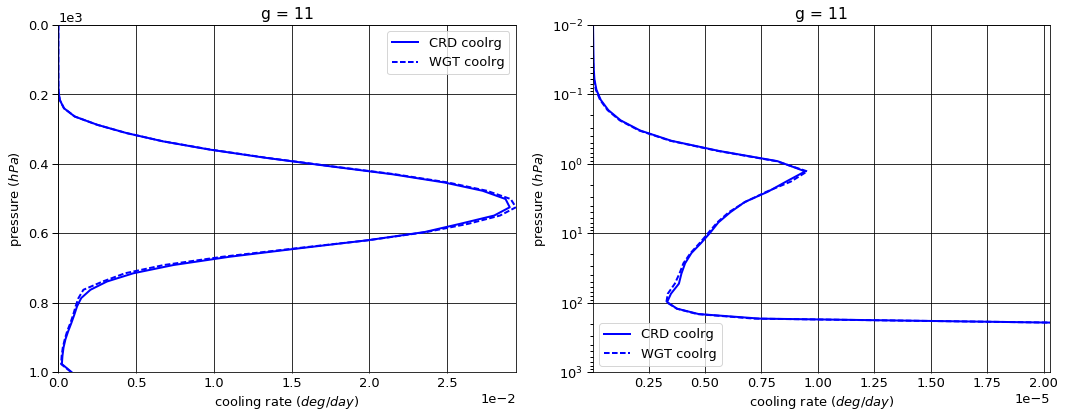

# Figure: cooling rate g-group 12

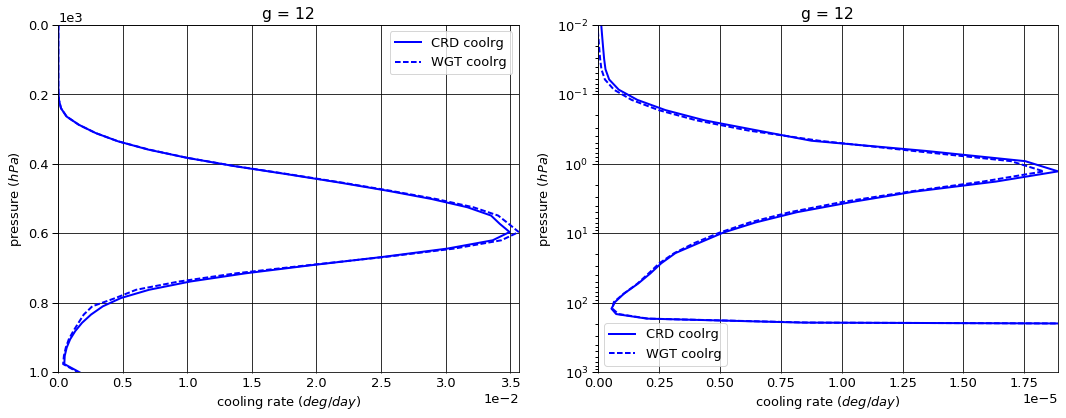

# Figure: cooling rate g-group 13

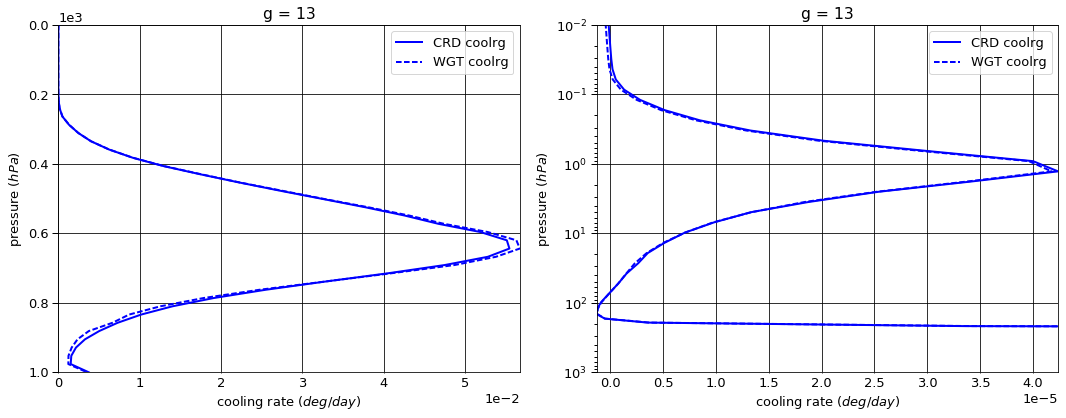

# Figure: cooling rate g-group 14

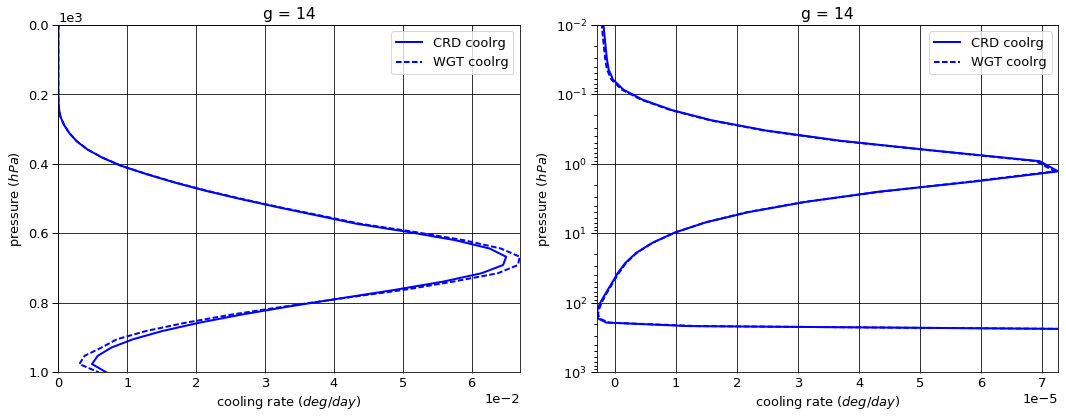

# Figure: cooling rate g-group 15

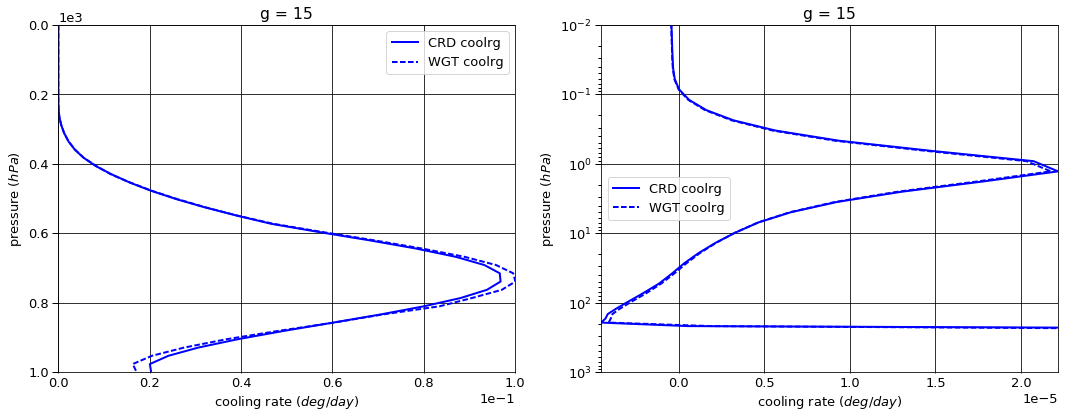

# Figure: cooling rate g-group 16

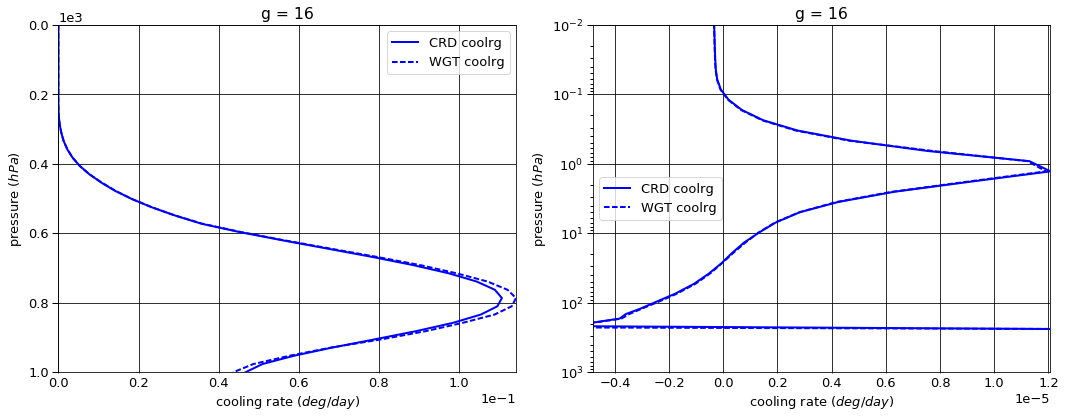

# Figure: cooling rate g-group 17

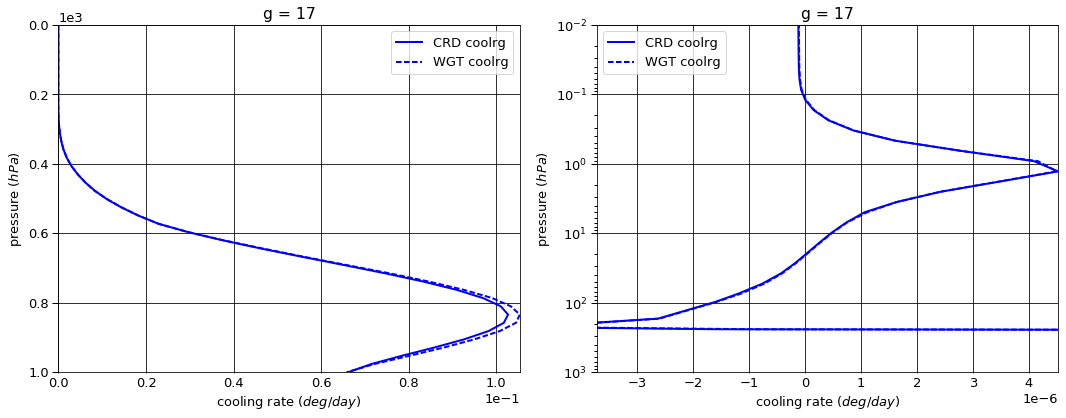

# Figure: cooling rate g-group 18

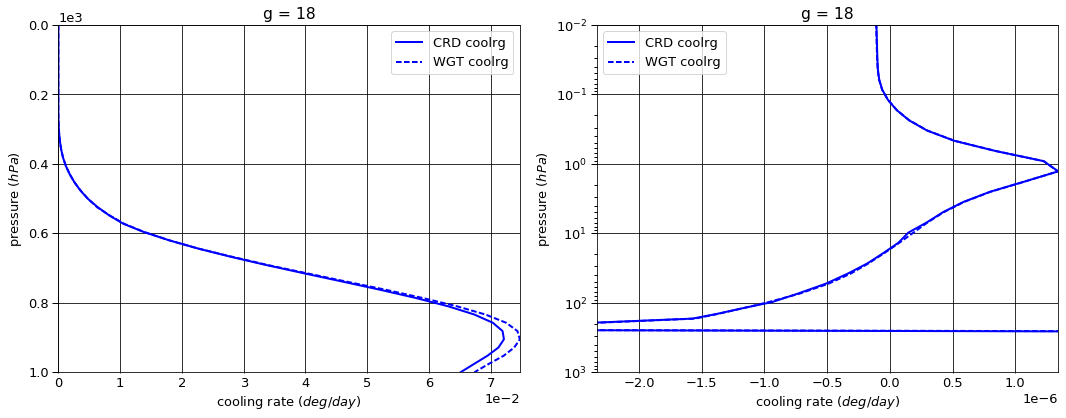

# Figure: cooling rate g-group 19

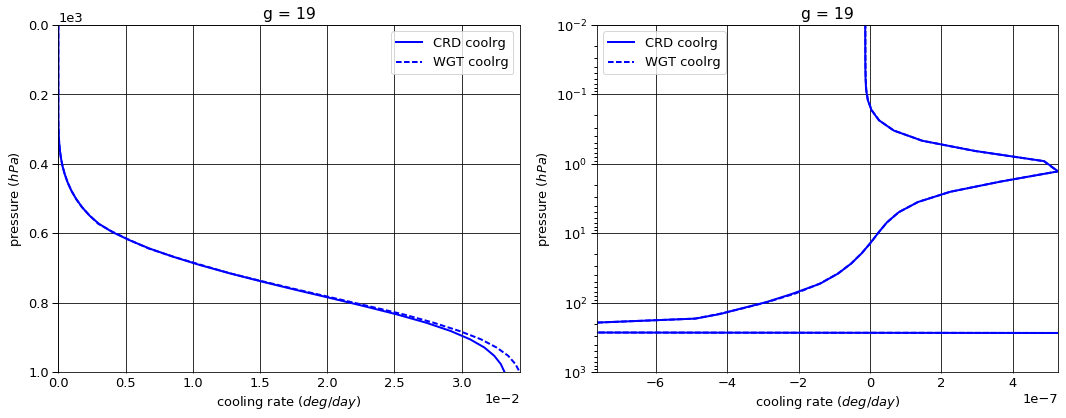

# Figure: cooling rate g-group 20

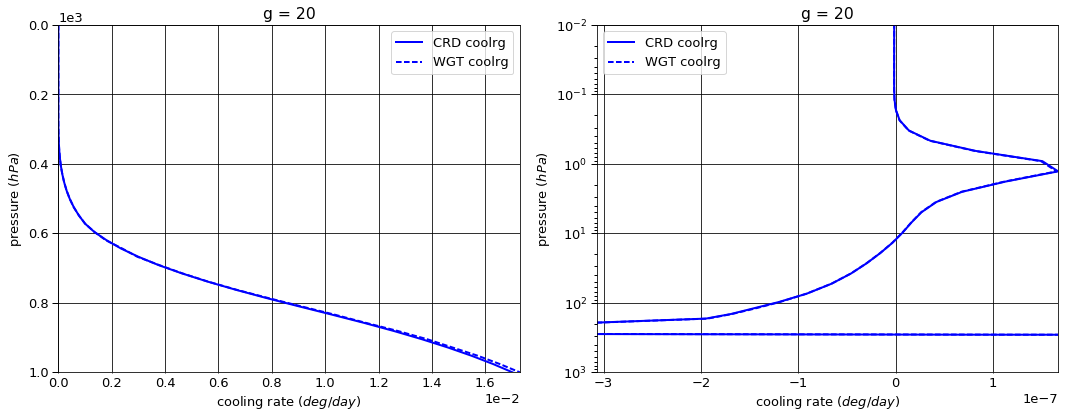

# Figure: cooling rate g-group total

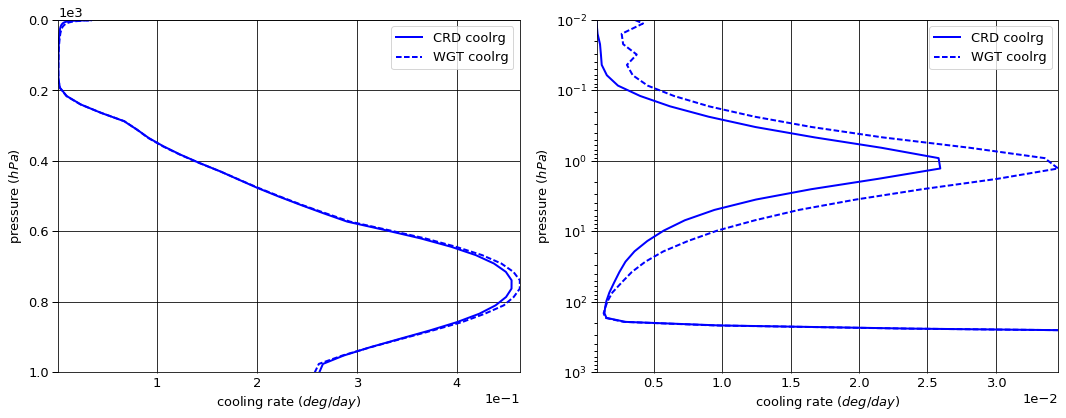

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.007334  0.000000 -0.007334
   1013.0   76    -0.018154  0.018146 -0.000008
2  0.0      1     -0.027904  0.000000 -0.027904
   1013.0   76    -0.065728  0.065698 -0.000030
3  0.0      1     -0.075019  0.000000 -0.075019
   1013.0   76    -0.172197  0.172119 -0.000078
4  0.0      1     -0.100311  0.000000 -0.100311
   1013.0   76    -0.217434  0.217335 -0.000099
5  0.0      1     -0.179347  0.000000 -0.179347
   1013.0   76    -0.371541  0.371373 -0.000169
6  0.0      1     -0.219339  0.000000 -0.219339
   1013.0   76    -0.423657  0.423465 -0.000192
7  0.0      1     -0.322812  0.000000 -0.322812
   1013.0   76    -0.591272  0.591002 -0.000270
8  0.0      1     -0.354761  0.000000 -0.354761
   1013.0   76    -0.613834  0.613555 -0.000279
9  0.0      1     -0.490946  0.000000 -0.490946
   1013.0   76    -0.801866  0.801469 -0.000397
10 0.0      1     -0.667820  0.000000 -0.667820
   1013.0   76    -1.035070  1.034253 -0.000816
11 0.0      1     -0.946704  0.000000 -0.946704
   1013.0   76    -1.390568  1.388354 -0.002213
12 0.0      1     -1.208505  0.000000 -1.208505
   1013.0   76    -1.687693  1.683211 -0.004482
13 0.0      1     -1.963008  0.000000 -1.963008
   1013.0   76    -2.604949  2.593464 -0.011485
14 0.0      1     -2.437056  0.000000 -2.437056
   1013.0   76    -3.094097  3.067054 -0.027043
15 0.0      1     -3.950252  0.000000 -3.950252
   1013.0   76    -4.785831  4.683191 -0.102640
16 0.0      1     -4.897095  0.000000 -4.897095
   1013.0   76    -5.674028  5.328366 -0.345663
17 0.0      1     -4.812748  0.000000 -4.812748
   1013.0   76    -5.404420  4.733747 -0.670673
18 0.0      1     -3.771546  0.000000 -3.771546
   1013.0   76    -4.102762  3.063856 -1.038906
19 0.0      1     -1.893614  0.000000 -1.893614
   1013.0   76    -2.006635  1.176690 -0.829945
20 0.0      1     -1.130124  0.000000 -1.130124
   1013.0   76    -1.173673  0.496686 -0.676987


WGT


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.007241  0.000000 -0.007241
   1013.0   76    -0.018154  0.018146 -0.000008
2  0.0      1     -0.028502  0.000000 -0.028502
   1013.0   76    -0.065728  0.065698 -0.000030
3  0.0      1     -0.074285  0.000000 -0.074285
   1013.0   76    -0.172197  0.172119 -0.000078
4  0.0      1     -0.099585  0.000000 -0.099585
   1013.0   76    -0.217434  0.217335 -0.000099
5  0.0      1     -0.176930  0.000000 -0.176930
   1013.0   76    -0.371541  0.371373 -0.000169
6  0.0      1     -0.218107  0.000000 -0.218107
   1013.0   76    -0.423657  0.423465 -0.000192
7  0.0      1     -0.321529  0.000000 -0.321529
   1013.0   76    -0.591272  0.591002 -0.000270
8  0.0      1     -0.353911  0.000000 -0.353911
   1013.0   76    -0.613834  0.613555 -0.000279
9  0.0      1     -0.490151  0.000000 -0.490151
   1013.0   76    -0.801866  0.801501 -0.000364
10 0.0      1     -0.666567  0.000000 -0.666567
   1013.0   76    -1.035070  1.034601 -0.000469
11 0.0      1     -0.945096  0.000000 -0.945096
   1013.0   76    -1.390568  1.388405 -0.002163
12 0.0      1     -1.206041  0.000000 -1.206041
   1013.0   76    -1.687693  1.683662 -0.004031
13 0.0      1     -1.959091  0.000000 -1.959091
   1013.0   76    -2.604949  2.594831 -0.010118
14 0.0      1     -2.430041  0.000000 -2.430041
   1013.0   76    -3.094097  3.074450 -0.019647
15 0.0      1     -3.939990  0.000000 -3.939990
   1013.0   76    -4.785831  4.714628 -0.071203
16 0.0      1     -4.887173  0.000000 -4.887173
   1013.0   76    -5.674028  5.403769 -0.270259
17 0.0      1     -4.806241  0.000000 -4.806241
   1013.0   76    -5.404420  4.809821 -0.594599
18 0.0      1     -3.767537  0.000000 -3.767537
   1013.0   76    -4.102762  3.135586 -0.967176
19 0.0      1     -1.892323  0.000000 -1.892323
   1013.0   76    -2.006635  1.199815 -0.806820
20 0.0      1     -1.129871  0.000000 -1.129871
   1013.0   76    -1.173673  0.501706 -0.671967


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1      0.000093  0.000000  0.000093
   1013.0   76     0.000000  0.000000  0.000000
2  0.0      1     -0.000598  0.000000 -0.000598
   1013.0   76     0.000000  0.000000  0.000000
3  0.0      1      0.000734  0.000000  0.000734
   1013.0   76     0.000000  0.000000  0.000000
4  0.0      1      0.000726  0.000000  0.000726
   1013.0   76     0.000000  0.000000  0.000000
5  0.0      1      0.002417  0.000000  0.002417
   1013.0   76     0.000000  0.000000  0.000000
6  0.0      1      0.001232  0.000000  0.001232
   1013.0   76     0.000000  0.000000  0.000000
7  0.0      1      0.001283  0.000000  0.001283
   1013.0   76     0.000000  0.000000  0.000000
8  0.0      1      0.000849  0.000000  0.000849
   1013.0   76     0.000000  0.000000  0.000000
9  0.0      1      0.000795  0.000000  0.000795
   1013.0   76     0.000000  0.000033  0.000033
10 0.0      1      0.001253  0.000000  0.001253
   1013.0   76     0.000000  0.000347  0.000347
11 0.0      1      0.001607  0.000000  0.001607
   1013.0   76     0.000000  0.000050  0.000050
12 0.0      1      0.002464  0.000000  0.002464
   1013.0   76     0.000000  0.000451  0.000451
13 0.0      1      0.003917  0.000000  0.003917
   1013.0   76     0.000000  0.001367  0.001367
14 0.0      1      0.007014  0.000000  0.007014
   1013.0   76     0.000000  0.007396  0.007396
15 0.0      1      0.010263  0.000000  0.010263
   1013.0   76     0.000000  0.031437  0.031437
16 0.0      1      0.009923  0.000000  0.009923
   1013.0   76     0.000000  0.075404  0.075403
17 0.0      1      0.006508  0.000000  0.006508
   1013.0   76     0.000000  0.076074  0.076074
18 0.0      1      0.004008  0.000000  0.004008
   1013.0   76     0.000000  0.071730  0.071730
19 0.0      1      0.001292  0.000000  0.001292
   1013.0   76     0.000000  0.023125  0.023125
20 0.0      1      0.000252  0.000000  0.000252
   1013.0   76     0.000000  0.005020  0.005020

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      2.761349e-06
   1001.112500 75     2.985282e-06
2  0.000312    1     -4.512239e-05
   1001.112500 75     1.076678e-05
3  0.000312    1      1.092923e-04
   1001.112500 75     2.817149e-05
4  0.000312    1      6.784104e-05
   1001.112500 75     3.585344e-05
5  0.000312    1      6.954834e-05
   1001.112500 75     6.084933e-05
6  0.000312    1      1.277731e-07
   1001.112500 75     6.933681e-05
7  0.000312    1      4.589755e-06
   1001.112500 75     9.727378e-05
8  0.000312    1      5.080949e-10
   1001.112500 75     1.019660e-04
9  0.000312    1      3.281978e-09
   1001.112500 75     1.473386e-04
10 0.000312    1      6.390303e-07
   1001.112500 75     3.329991e-04
11 0.000312    1      2.713842e-09
   1001.112500 75     8.685301e-04
12 0.000312    1     -1.063472e-07
   1001.112500 75     1.649862e-03
13 0.000312    1     -6.440812e-07
   1001.112500 75     3.743583e-03
14 0.000312    1     -2.937656e-06
   1001.112500 75     6.962656e-03
15 0.000312    1     -5.390099e-07
   1001.112500 75     2.033731e-02
16 0.000312    1     -4.054432e-07
   1001.112500 75     4.669367e-02
17 0.000312    1     -1.264939e-07
   1001.112500 75     6.614116e-02
18 0.000312    1     -1.228374e-07
   1001.112500 75     6.508634e-02
19 0.000312    1     -1.353319e-08
   1001.112500 75     3.320830e-02
20 0.000312    1     -1.480005e-09
   1001.112500 75     1.701898e-02


WGT


coolrg
g  pressure    layer              
1  0.000312    1      4.548186e-06
   1001.112500 75     2.985282e-06
2  0.000312    1      7.964835e-04
   1001.112500 75     1.076678e-05
3  0.000312    1      6.143715e-04
   1001.112500 75     2.817149e-05
4  0.000312    1      1.889453e-04
   1001.112500 75     3.585344e-05
5  0.000312    1      1.322843e-04
   1001.112500 75     6.084933e-05
6  0.000312    1      1.396773e-07
   1001.112500 75     6.933681e-05
7  0.000312    1      5.681710e-06
   1001.112500 75     9.727378e-05
8  0.000312    1      5.538760e-10
   1001.112500 75     1.007467e-04
9  0.000312    1      2.090919e-09
   1001.112500 75     1.314311e-04
10 0.000312    1      1.171185e-07
   1001.112500 75     1.692062e-04
11 0.000312    1     -1.357972e-08
   1001.112500 75     8.444564e-04
12 0.000312    1     -2.429489e-07
   1001.112500 75     1.536206e-03
13 0.000312    1     -9.158647e-07
   1001.112500 75     3.536403e-03
14 0.000312    1     -3.248319e-06
   1001.112500 75     5.849531e-03
15 0.000312    1     -5.512702e-07
   1001.112500 75     1.716386e-02
16 0.000312    1     -4.098983e-07
   1001.112500 75     4.362848e-02
17 0.000312    1     -1.182563e-07
   1001.112500 75     6.580712e-02
18 0.000312    1     -1.258754e-07
   1001.112500 75     6.733231e-02
19 0.000312    1     -1.300783e-08
   1001.112500 75     3.433720e-02
20 0.000312    1     -1.483007e-09
   1001.112500 75     1.729664e-02


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      1.786837e-06
   1001.112500 75     0.000000e+00
2  0.000312    1      8.416059e-04
   1001.112500 75     0.000000e+00
3  0.000312    1      5.050792e-04
   1001.112500 75     0.000000e+00
4  0.000312    1      1.211043e-04
   1001.112500 75     0.000000e+00
5  0.000312    1      6.273594e-05
   1001.112500 75     0.000000e+00
6  0.000312    1      1.190421e-08
   1001.112500 75     0.000000e+00
7  0.000312    1      1.091955e-06
   1001.112500 75     0.000000e+00
8  0.000312    1      4.578108e-11
   1001.112500 75    -1.219340e-06
9  0.000312    1     -1.191059e-09
   1001.112500 75    -1.590747e-05
10 0.000312    1     -5.219118e-07
   1001.112500 75    -1.637929e-04
11 0.000312    1     -1.629356e-08
   1001.112500 75    -2.407374e-05
12 0.000312    1     -1.366017e-07
   1001.112500 75    -1.136563e-04
13 0.000312    1     -2.717835e-07
   1001.112500 75    -2.071801e-04
14 0.000312    1     -3.106629e-07
   1001.112500 75    -1.113126e-03
15 0.000312    1     -1.226033e-08
   1001.112500 75    -3.173449e-03
16 0.000312    1     -4.455030e-09
   1001.112500 75    -3.065192e-03
17 0.000312    1      8.237590e-09
   1001.112500 75    -3.340460e-04
18 0.000312    1     -3.038060e-09
   1001.112500 75     2.245967e-03
19 0.000312    1      5.253570e-10
   1001.112500 75     1.128899e-03
20 0.000312    1     -3.002000e-12
   1001.112500 75     2.776530e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-29.456244,0.000000,-29.456244
1013.0,76,-36.235408,32.523033,-3.712374



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-29.400212,0.000000,-29.400212
1013.0,76,-36.235408,32.815467,-3.419941



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.056032,0.000000,0.056032
1013.0,76,0.000000,0.292433,0.292433


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.000205
1001.112500,75,0.262598



WGT


,,coolrg
pressure,layer,
0.000312,1,0.001737
1001.112500,75,0.258039



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.001532
1001.112500,75,-0.004559


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.000500,0.000502
2,0.001813,0.001823
3,0.004750,0.004779
4,0.006000,0.006009
5,0.010250,0.010307
6,0.011687,0.011757
7,0.016313,0.016363
8,0.016938,0.017009
9,0.022125,0.022236


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.322531e-20
2,1.367935e-20
3,8.056931e-21
4,4.745410e-21
5,2.794974e-21
6,1.646197e-21
7,9.695851e-22
8,5.710709e-22
9,3.363521e-22


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [20]
    p_refs = [500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.322531e-20,NaN,0.000500,0.000502,0.000500,0.000502,500.0
2,1.367935e-20,0.588985,0.001813,0.001823,0.002313,0.002325,500.0
3,8.056931e-21,0.588985,0.004750,0.004779,0.007063,0.007105,500.0
4,4.745410e-21,0.588985,0.006000,0.006009,0.013063,0.013114,500.0
5,2.794974e-21,0.588985,0.010250,0.010307,0.023312,0.023420,500.0
6,1.646197e-21,0.588985,0.011687,0.011757,0.035000,0.035177,500.0
7,9.695851e-22,0.588985,0.016313,0.016363,0.051313,0.051540,500.0
8,5.710709e-22,0.588985,0.016938,0.017009,0.068250,0.068549,500.0
9,3.363521e-22,0.588985,0.022125,0.022236,0.090375,0.090786,500.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                     
1     1      0.000312  5.300665e-22  4.897971e-22   1.082216
      2      0.000312  3.286246e-20  1.377163e-21  23.862431
      3      0.000312  8.385880e-21  5.427964e-22  15.449403
      4      0.000312  2.193609e-21  1.407348e-22  15.586828
      5      0.000312  9.525413e-22  8.480079e-23  11.232695
      6      0.000312  1.099991e-24  1.035283e-24   1.062503
      7      0.000312  4.207810e-23  8.143454e-24   5.167107
      8      0.000312  5.627210e-27  5.621218e-27   1.001066
      9      0.000312  2.907536e-26  2.868428e-26   1.013634
      10     0.000312  4.711898e-24  9.193564e-25   5.125213
      11     0.000312  1.818910e-25  1.247988e-25   1.457474
      12     0.000312  1.050642e-24  9.524801e-26  11.030596
      13     0.000312  1.647509e-24  1.948942e-25   8.453350
      14     0.000312  3.508936e-24  1.929116e-25  18.189342
      15     0.000312  2.983717e-25  5.347430e-26   5.579722
      16     0.000312  1.547436e-25  2.322541e-26   6.662687
      17     0.000312  3.985424e-26  9.522630e-27   4.185214
      18     0.000312  4.785563e-26  8.866719e-27   5.397219
      19     0.000312  8.815012e-27  4.314459e-27   2.043133
      20     0.000312  1.567011e-27  1.255878e-27   1.247742
2     1      0.000750  5.372648e-22  4.958092e-22   1.083612
      2      0.000750  3.301710e-20  1.378661e-21  23.948671
      3      0.000750  8.427674e-21  5.431194e-22  15.517166
      4      0.000750  2.204813e-21  1.409670e-22  15.640629
      5      0.000750  9.594901e-22  8.489569e-23  11.301989
      6      0.000750  1.115412e-24  1.049172e-24   1.063136
      7      0.000750  4.256700e-23  8.174001e-24   5.207609
      8      0.000750  6.235060e-27  6.228866e-27   1.000994
      9      0.000750  2.950475e-26  2.910849e-26   1.013613
      10     0.000750  4.749325e-24  9.218604e-25   5.151892
      11     0.000750  1.840904e-25  1.258408e-25   1.462883
      12     0.000750  1.058235e-24  9.535469e-26  11.097879
      13     0.000750  1.656582e-24  1.954309e-25   8.476560
      14     0.000750  3.524471e-24  1.934259e-25  18.221299
      15     0.000750  3.009097e-25  5.376261e-26   5.597006
      16     0.000750  1.557537e-25  2.335842e-26   6.667989
      17     0.000750  4.023846e-26  9.579645e-27   4.200413
      18     0.000750  4.803681e-26  8.888856e-27   5.404161
      19     0.000750  8.894572e-27  4.342451e-27   2.048284
      20     0.000750  1.584885e-27  1.269157e-27   1.248770
3     1      0.001052  5.518386e-22  5.081101e-22   1.086061
      2      0.001052  3.334724e-20  1.381417e-21  24.139886
      3      0.001052  8.516836e-21  5.435912e-22  15.667722
      4      0.001052  2.228817e-21  1.414218e-22  15.760068
      5      0.001052  9.742979e-22  8.504365e-23  11.456444
      6      0.001052  1.145315e-24  1.075724e-24   1.064692
      7      0.001052  4.361346e-23  8.231365e-24   5.298448
      8      0.001052  6.796603e-27  6.789969e-27   1.000977
      9      0.001052  3.008535e-26  2.967790e-26   1.013729
      10     0.001052  4.828524e-24  9.267565e-25   5.210133
      11     0.001052  1.886864e-25  1.279221e-25   1.475010
      12     0.001052  1.074424e-24  9.551525e-26  11.248719
      13     0.001052  1.675955e-24  1.965092e-25   8.528635
      14     0.001052  3.557798e-24  1.944769e-25  18.294192
      15     0.001052  3.063335e-25  5.435213e-26   5.636089
      16     0.001052  1.579167e-25  2.362921e-26   6.683113
      17     0.001052  4.106092e-26  9.696162e-27   4.234760
      18     0.001052  4.841684e-26  8.932711e-27   5.420173
      19     0.001052  9.064627e-27  4.401369e-27   2.059502
      20     0.001052  1.621566e-27  1.295895e-27   1.251310
4     1      0.001476  5.677914e-22  5.215981e-22   1.088561
      2      0.001476  3.369865e-20  1.384372e-21  24.342205
      3      0.001476  8.612062e-21  5.441089e-22  15.827827
      4      0.001476  2.254458e-21  1.418861e-2

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
